<span style="font-family:Comic Sans MS; color:green; font-size: 30px">Real Estate Data Cleanup</span>

First module project. This data contains registers from Fotocasa which is one of the most popular websites of real estate in Spain.
The objective of the project is to extract as much information as possible with the knowledge acquired so far about data science.


In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#### Exercise 00: Read the data from the csv file and try to visualize the table

In [130]:
df = pd.read_csv('real_estate.csv', sep=';')
df

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


In [131]:
# Print the number of rows and columns in the df using shape()
df.shape

(15335, 37)

In [132]:
# Show first 5 rows
df.head(5)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


In [133]:
# Show the column name
print(df.columns)
print(' ')

Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone'],
      dtype='object')
 


#### Exercise 01: which is the most expensive house in the dataset? Print only the 'address' and 'price' columns

In [134]:
df[['address', 'price']][df['price'] == df['price'].max()]    # this shows index, address and price column of most expensive house
print('The most expensive house is located at', df.loc[df['price'].idxmax()]['address'], 'and costs', df['price'].max(), 'euros.')
print(' ')

The most expensive house is located at El Escorial and costs 8500000 euros.
 


#### Exercise 02: Which is the cheapest house in the dataset? Print the address and price of the selected house.

In [135]:
print('The cheapest house is located at', df.loc[df['price'].idxmin()]['address'], 'and costs', df['price'].min(), 'euros.')
print(' ')

The cheapest house is located at Parla and costs 0 euros.
 


#### Exercise 03: Which is the biggest and smallest house in the dataset? print only the 'address' and 'surface' columns and the surface of the selected houses

In [136]:
print('The biggest house is located in', df.loc[df['surface'].idxmax()]['address'], 'and has', df['surface'].max(), 'square meters.')
print(' ')
print('The smallest house is located in', df.loc[df['surface'].idxmin()]['address'], 'and has', df['surface'].min(), 'square meters.')
print(' ')

The biggest house is located in Sevilla la Nueva and has 249000.0 square meters.
 
The smallest house is located in Calle Amparo,  Madrid Capital and has 15.0 square meters.
 


#### Exercise 04: How many populations (level5 column) the dataset contains? Print the name of the populations with comma separator.

In [137]:
print('The populations in level5 column are: ', ', '.join(df['level5'].unique()))
# another way would be: df['level5'].unique()
print(' ')
print('And the number of the above populations is', df['level5'].nunique())

The populations in level5 column are:  Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín

#### Exercise 05: Does the dataset contains NAs? Print a boolean value (true or fase) followed by the rows/cols that contains NAs.

In [138]:
print('Does the dataset contains NAs?', df.isnull().values.any())
print('The rows and columns that contain NAs are: ')
print(df.isnull().sum())
print(' ')

Does the dataset contains NAs? True
The rows and columns that contain NAs are: 
Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode   

#### Exercise 06: Delete the NAs from the dataset and print a comparison between the dimensions of the original dataset versus the new dataset after the deletion

In [139]:
# print('The original dataset dimensions are: ', df.shape)
# df_after_na_deletion = df.dropna()
# print('The new dataset dimensions are: ', df_after_na_deletion.shape)

#### Exercise 07: Which is the mean of prices in the population (level5 column) of 'Arroyomolions (Madrid)'

In [140]:
# Exercise 7: Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"?
print('The mean of prices in Arroyomolinos (Madrid) is: ', df[df['level5'] == 'Arroyomolinos (Madrid)']['price'].mean())
print(' ')

The mean of prices in Arroyomolinos (Madrid) is:  294541.59854014596
 


#### Exercise 08: Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain the results

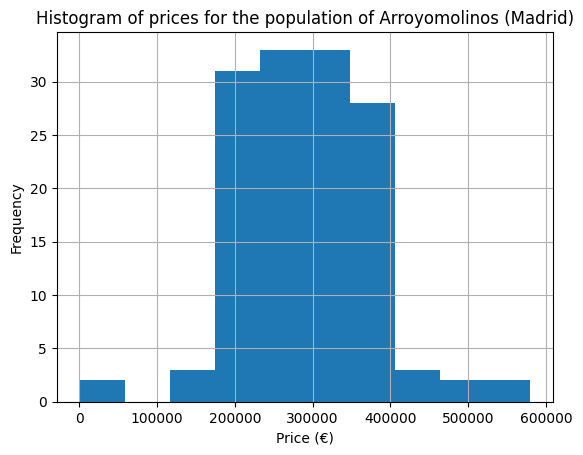

In [141]:
df[df['level5'] == 'Arroyomolinos (Madrid)']['price'].hist()
#can also be: df['price'][df['level5'] == 'Arroyomolinos (Madrid)'].plot(kind='hist',bins=10, color='green', edgecolor='black') 
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.title('Histogram of prices for the population of Arroyomolinos (Madrid)')
print(' ')

#### Exercise 09: Are the averages of "Valdemorillo" and "Galapagar" prices the same? Print both average prices and write a conclusion

In [142]:
print('The average price in Valdemorillo is', df[df['level5'] == 'Valdemorillo']['price'].mean(), 'and the average price in Galapagar is', df[df['level5'] == 'Galapagar']['price'].mean())
print('Populations have similar average price.')
print(' ')
# Bar chart to show the above
#plt.subplot(1,2,1)
#plt.bar('Valdemorillo', df['price'][df['level5'] == 'Valdemorillo'].mean(), color='green')
#plt.xlabel('Valdemorillo')
#plt.ylabel('Average price (€)')
#plt.subplot(1,2,2)
#plt.bar('Galapagar', df['price'][df['level5'] == 'Galapagar'].mean(), color='green')
#plt.xlabel('Galapagar')
#plt.ylabel('Average price (€)')
#plt.tight_layout()
#plt.show()

The average price in Valdemorillo is 363860.2931034483 and the average price in Galapagar is 360063.20238095237
Populations have similar average price.
 


#### Exercise 10: Are the averages of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same?

In [143]:
print('The price per square meter in Valdemorillo is', df[df['level5'] == 'Valdemorillo']['price'].mean() / df[df['level5'] == 'Valdemorillo']['surface'].mean())
print('The price per square meter in Galapagar is', df[df['level5'] == 'Galapagar']['price'].mean() / df[df['level5'] == 'Galapagar']['surface'].mean())
print(' ')

The price per square meter in Valdemorillo is 1039.5447972876266
The price per square meter in Galapagar is 1178.5257998852853
 


#### Exercise 11: Analyse the relation between the surface and the price of the houses

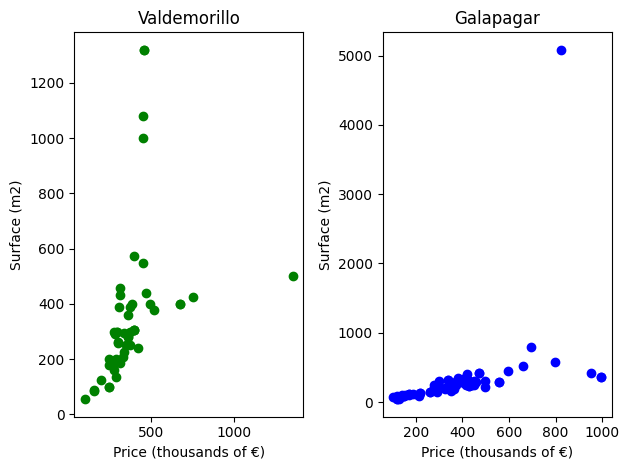

In [144]:
# Create scatter plot for the relationship between surface and price of houses in 'Valdemorillo' and 'Galapagar' 
plt.subplot(1,2,1)
plt.scatter(df['price'][df['level5'] == 'Valdemorillo'] / 1000, df['surface'][df['level5'] == 'Valdemorillo'], color='green')
plt.xlabel('Price (thousands of €)')
plt.ylabel('Surface (m2)')
plt.title('Valdemorillo')
plt.subplot(1,2,2)
plt.scatter(df['price'][df['level5'] == 'Galapagar'] / 1000, df['surface'][df['level5'] == 'Galapagar'], color='blue')
plt.xlabel('Price (thousands of €)')
plt.ylabel('Surface (m2)')
plt.title('Galapagar')
plt.tight_layout() # To avoid overlapping between subplots
plt.show()

#### Exercise 12: How many real estate agencies the dataset contains?

In [145]:
print('The number of real estate agencies is', df['realEstate_name'].nunique()) # nunique() returns number of unique values excluding NaN values (null values)
print(' ')

The number of real estate agencies is 1821
 


#### Exercise 13: Which is the population (level5 column) that contains the most houses?

In [146]:
print('The population that contains the most houses is', df['level5'].value_counts().idxmax())
print(' ')

The population that contains the most houses is  Madrid Capital
 


#### Exercise 14: Make a subset of the original dataframe that contains Fuenlabrada, Leganés, Getafe and Alcorcón

In [147]:
df_subset = df[df['level5'].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])]
df_subset.head()
print(' ')

#### Exercise 15: Using df_subset make a bar plot of the median of the prices and explain what you observe

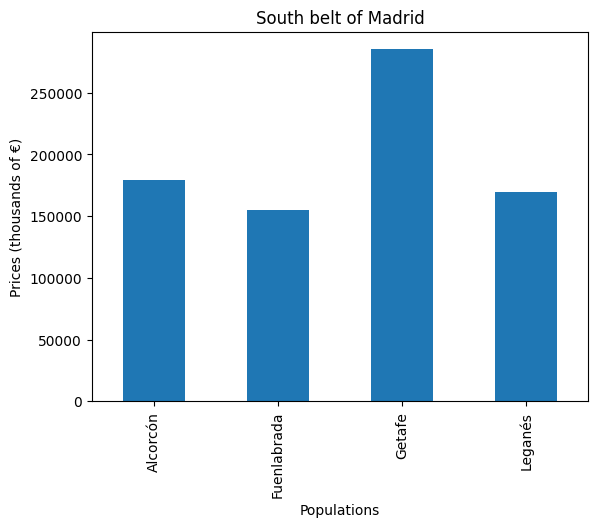

In [148]:
df_subset.groupby('level5')['price'].median().plot(kind='bar')
plt.xlabel('Populations')
plt.ylabel('Prices (thousands of €)')
plt.title('South belt of Madrid')
plt.show()

#### Exercise 16: Calculate the sample mean and variance of the variables price, rooms, surface area and bathrooms in df_subset

In [149]:
print('The sample mean of the variables price, rooms, surface area and bathrooms for the df_subset are: ')
print(df_subset[['price','rooms','surface','bathrooms']].mean())
print(' ')
print('The sample variance of the variables price, rooms, surface area and bathrooms for the df_subset are: ')
print(df_subset[['price','rooms','surface','bathrooms']].var())
print(' ')

The sample mean of the variables price, rooms, surface area and bathrooms for the df_subset are: 
price        223094.480706
rooms             3.017738
surface         111.752224
bathrooms         1.633222
dtype: float64
 
The sample variance of the variables price, rooms, surface area and bathrooms for the df_subset are: 
price        1.492137e+10
rooms        7.188859e-01
surface      4.263052e+03
bathrooms    5.717969e-01
dtype: float64
 


#### Exercise 17: What is the most expensive house of each population from df_subset?

In [150]:
print('Fuenlabrada => Address:', df_subset[df['level5'] == 'Fuenlabrada'].loc[df_subset[df_subset['level5'] == 'Fuenlabrada']['price'].idxmax()]['address'], 'Price', df_subset[df_subset['level5'] == 'Fuenlabrada']['price'].max(), '€')
print('Leganés => Address:', df_subset[df['level5'] == 'Leganés'].loc[df_subset[df_subset['level5'] == 'Leganés']['price'].idxmax()]['address'], 'Price', df_subset[df_subset['level5'] == 'Leganés']['price'].max(), '€')
print('Getafe => Address:', df_subset[df['level5'] == 'Getafe'].loc[df_subset[df_subset['level5'] == 'Getafe']['price'].idxmax()]['address'], 'Price', df_subset[df_subset['level5'] == 'Getafe']['price'].max(), '€')
print('Alcorcón => Address:', df_subset[df['level5'] == 'Alcorcón'].loc[df_subset[df_subset['level5'] == 'Alcorcón']['price'].idxmax()]['address'], 'Price', df_subset[df_subset['level5'] == 'Alcorcón']['price'].max(), '€')

Fuenlabrada => Address: Calle de Paulo Freire, 5, Fuenlabrada Price 490000 €
Leganés => Address: Avenida Reina Sofía, Leganés Price 650000 €
Getafe => Address: Getafe Price 1050000 €
Alcorcón => Address: Alcorcón Price 950000 €


C:\Users\Jorge Payà\AppData\Local\Temp\ipykernel_15220\1084212321.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Fuenlabrada => Address:', df_subset[df['level5'] == 'Fuenlabrada'].loc[df_subset[df_subset['level5'] == 'Fuenlabrada']['price'].idxmax()]['address'], 'Price', df_subset[df_subset['level5'] == 'Fuenlabrada']['price'].max(), '€')
C:\Users\Jorge Payà\AppData\Local\Temp\ipykernel_15220\1084212321.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Leganés => Address:', df_subset[df['level5'] == 'Leganés'].loc[df_subset[df_subset['level5'] == 'Leganés']['price'].idxmax()]['address'], 'Price', df_subset[df_subset['level5'] == 'Leganés']['price'].max(), '€')
C:\Users\Jorge Payà\AppData\Local\Temp\ipykernel_15220\1084212321.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Getafe => Address:', df_subset[df['level5'] == 'Getafe'].loc[df_subset[df_subset['level5'

#### Exercise 18: Normalize the variable of prices for each population and plot 4 histograms in the same plot for df_subset

level5
Alcorcón       Axes(0.125,0.11;0.775x0.77)
Fuenlabrada    Axes(0.125,0.11;0.775x0.77)
Getafe         Axes(0.125,0.11;0.775x0.77)
Leganés        Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

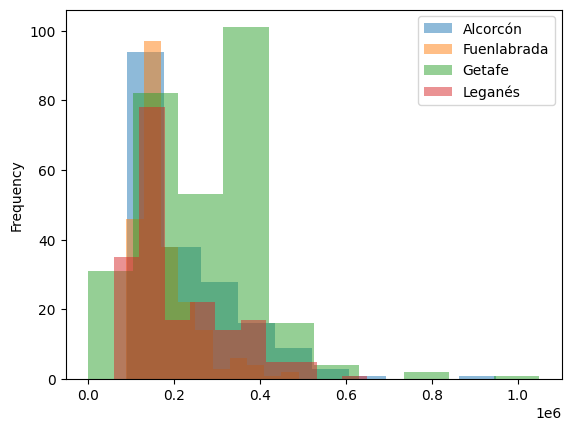

In [151]:
fig, ax = plt.subplots()   # creates new figure, since no args are passed to subplots() it creates a single subplot in fig and returns figure (fig) and axes (ax)
df_subset.groupby('level5')['price'].plot(kind='hist', alpha=0.5, legend=True)
# the above creates a histogram for each group, the alpha=0.5 param sets the transparency of hist to 50%

<div class="alert alert-block alert-warning">
<bWARNINGe:</b>EXERCISE 18 MUST BE REVIEWED.
</div>

#### Exercise 19: What can you say about the price per square meter (price/m2) between the towns of Getafe and Alcorcón

In [152]:
df_subset['price_per_m2'] = df_subset['price'] / df_subset['surface']
print('The price per square meter of Getafe is', df_subset[df_subset['level5'] == 'Getafe']['price_per_m2'].mean(), 'and the price per square meter in Alcorcón is', df_subset[df_subset['level5'] == 'Alcorcón']['price_per_m2'].mean())    

The price per square meter of Getafe is 2066.314949251463 and the price per square meter in Alcorcón is 2239.302480199618


C:\Users\Jorge Payà\AppData\Local\Temp\ipykernel_15220\2595511621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['price_per_m2'] = df_subset['price'] / df_subset['surface']


#### Exercise 20: Make the same subplot for 4 different populations and rearrange them on the same graph

Text(0, 0.5, 'Prices (thousands of €)')

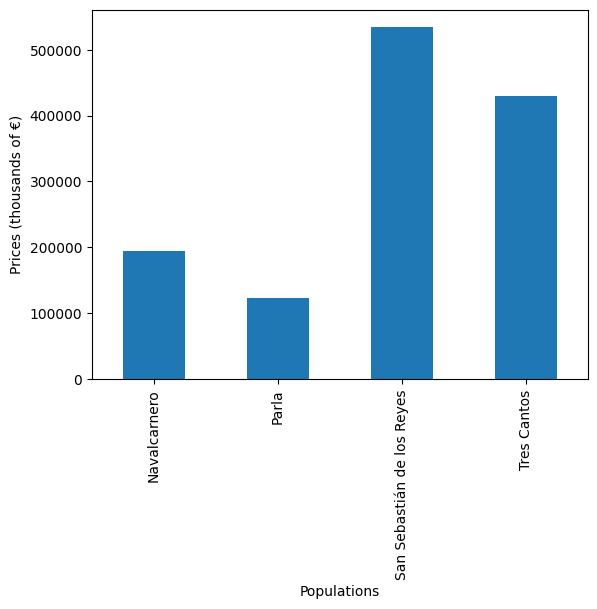

In [154]:
df_subset2 = df[df['level5'].isin(["Navalcarnero","Parla","Tres Cantos","San Sebastián de los Reyes"])]
df_subset2.groupby('level5')['price'].median().plot(kind='bar')
plt.xlabel('Populations')
plt.ylabel('Prices (thousands of €)')

#### Exercise 21: Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population

<div class="alert alert-block alert-warning">
<b>WARNING:</b> EXERCISE 21 MUST BE REVIEWED
</div>